In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylabel import importer

In [10]:
training_data = importer.ImportYoloV5(
    path='dip_dataset/train/labels/',
    img_ext='jpg',
    cat_names=['Button', 'Capacitor Jumper', 'Capacitor', 'Clock', 'Connector', 'Diode', 'EM', 'Electrolytic Capacitor', 'Ferrite Bead', 'IC', 'Inductor', 'Jumper', 'Led', 'Pads', 'Pins', 'Resistor Jumper', 'Resistor Network', 'Resistor', 'Switch', 'Test Point', 'Transistor', 'Unknown Unlabeled', 'iC', 'Crystal Oscillator'],
    path_to_images='../../train/images/'
)
valid_data = importer.ImportYoloV5(
    path='dip_dataset/valid/labels/',
    img_ext='jpg',
    cat_names=['Button', 'Capacitor Jumper', 'Capacitor', 'Clock', 'Connector', 'Diode', 'EM', 'Electrolytic Capacitor', 'Ferrite Bead', 'IC', 'Inductor', 'Jumper', 'Led', 'Pads', 'Pins', 'Resistor Jumper', 'Resistor Network', 'Resistor', 'Switch', 'Test Point', 'Transistor', 'Unknown Unlabeled', 'iC', 'Crystal Oscillator'],
    path_to_images='../../valid/images/'
)
test_data = importer.ImportYoloV5(
    path='dip_dataset/valid/labels/',
    img_ext='jpg',
    cat_names=['Button', 'Capacitor Jumper', 'Capacitor', 'Clock', 'Connector', 'Diode', 'EM', 'Electrolytic Capacitor', 'Ferrite Bead', 'IC', 'Inductor', 'Jumper', 'Led', 'Pads', 'Pins', 'Resistor Jumper', 'Resistor Network', 'Resistor', 'Switch', 'Test Point', 'Transistor', 'Unknown Unlabeled', 'iC', 'Crystal Oscillator'],
    path_to_images='../../valid/images/'
)



Importing YOLO files...: 100%|██████████| 100/100 [00:03<00:00, 32.46it/s]


In [12]:
training_df = training_data.df
valid_df = valid_data.df
test_df = test_data.df
training_df.sample(5)


,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_iscrowd,ann_keypoints,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
27792,../../train/images/,pcb133rec1_jpg.rf.c458d532a6b62b748849c4658a7b...,,174,1952,1628,3,,485.0,895.0,...,,,,,,2,Capacitor,,,1
62863,../../train/images/,pcb40rec1_jpg.rf.97720c1304084805ac4fbdbd9f145...,,337,1544,1256,3,,1298.0,162.0,...,,,,,,4,Connector,,,1
67679,../../train/images/,pcb49rec1_jpg.rf.ba786e8b3a1ef335d2068886587a4...,,353,1932,570,3,,899.0,75.0,...,,,,,,16,Resistor Network,,,1
96234,../../train/images/,pcb99rec1_jpg.rf.9b5cff547742ccbd9a467f48d3bb6...,,485,1930,1706,3,,1751.0,1663.0,...,,,,,,16,Resistor Network,,,1
89077,../../train/images/,pcb92rec1_jpg.rf.423575537b439a3bcd86223cf1fef...,,468,1932,1132,3,,943.0,892.0,...,,,,,,2,Capacitor,,,1


In [14]:
dataset = pd.concat([training_df, valid_df, test_df])
dataset.sample(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_iscrowd,ann_keypoints,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
76965,../../train/images/,pcb71rec1_jpg.rf.f57ccc70f12e11eadb4094ebdc267...,,411,1854,310,3,,1743.0,134.0,...,,,,,,2,Capacitor,,,1
95837,../../train/images/,pcb99rec1_jpg.rf.07d10b4431f90e5b6bb2eee6c8c84...,,484,1971,1743,3,,462.0,124.0,...,,,,,,1,Capacitor Jumper,,,1
65837,../../train/images/,pcb43rec1_jpg.rf.ab5c4ca00cc39f13b6ab7d18048e8...,,346,1700,1484,3,,598.0,889.0,...,,,,,,2,Capacitor,,,1
54440,../../train/images/,pcb30rec1_jpg.rf.c34ccdacf46184f410645130d9a3a...,,301,2685,2118,3,,1789.0,193.0,...,,,,,,15,Resistor Jumper,,,1
58972,../../train/images/,pcb38rec1_jpg.rf.af2c78f15af8ce2487a1075fe68ef...,,325,2121,1765,3,,1423.0,1630.0,...,,,,,,15,Resistor Jumper,,,1


In [15]:
dataset.columns

Index(['img_folder', 'img_filename', 'img_path', 'img_id', 'img_width',
       'img_height', 'img_depth', 'ann_segmented', 'ann_bbox_xmin',
       'ann_bbox_ymin', 'ann_bbox_xmax', 'ann_bbox_ymax', 'ann_bbox_width',
       'ann_bbox_height', 'ann_area', 'ann_segmentation', 'ann_iscrowd',
       'ann_keypoints', 'ann_pose', 'ann_truncated', 'ann_difficult', 'cat_id',
       'cat_name', 'cat_supercategory', 'split', 'annotated'],
      dtype='object')

In [16]:
dataset = dataset.drop(columns=['ann_segmentation', 'ann_iscrowd',
       'ann_keypoints', 'ann_pose', 'ann_truncated', 'ann_difficult', 'cat_supercategory', 'split'])

In [17]:
dataset.sample(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,ann_bbox_xmax,ann_bbox_ymax,ann_bbox_width,ann_bbox_height,ann_area,cat_id,cat_name,annotated
id,,,,,,,,,,,,,,,,,,
4248,../../valid/images/,pcb121rec1_jpg.rf.0364494ca14406a5a986de9bbaaa...,,20,2147,2006,3,,1468.0,1880.0,1486.23,1887.49,18.23,7.49,136.5427,1,Capacitor Jumper,1
82776,../../train/images/,pcb84rec1_jpg.rf.2b195e2125cb3cc44d1c6f98d9f42...,,444,1996,1694,3,,1174.0,1263.0,1195.00,1276.00,21.00,13.00,273.0000,2,Capacitor,1
82481,../../train/images/,pcb83rec1_jpg.rf.175899d8601e975d08a894c44bfa1...,,440,1755,1005,3,,974.0,191.0,993.52,230.46,19.52,39.46,770.2592,15,Resistor Jumper,1
78917,../../train/images/,pcb74rec1_jpg.rf.496ad23d525d74dcc81d22d301309...,,421,1854,344,3,,1121.0,94.0,1133.00,112.00,12.00,18.00,216.0000,2,Capacitor,1
60714,../../train/images/,pcb3rec1_jpg.rf.3df0de3d0fd5f5c54bc166b2f27ae0...,,332,1718,1864,3,,222.0,1141.0,234.00,1167.00,12.00,26.00,312.0000,16,Resistor Network,1


In [18]:
dataset = dataset.dropna(axis=1)
dataset.sample(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,ann_bbox_xmax,ann_bbox_ymax,ann_bbox_width,ann_bbox_height,ann_area,cat_id,cat_name,annotated
id,,,,,,,,,,,,,,,,,,
501,../../valid/images/,MicroZed_Top_jpg.rf.307f05dec30a3bae78c2506143...,,6,2603,1415,3,,1030.0,162.0,1053.00,177.0,23.00,15.0,345.0,2,Capacitor,1
57086,../../train/images/,pcb35rec1_jpg.rf.1a548c8be670edcbb2b7a83f8f658...,,312,1731,703,3,,1607.0,479.0,1630.00,511.0,23.00,32.0,736.0,16,Resistor Network,1
7040,../../valid/images/,pcb154rec1_jpg.rf.dd2c45cc7676370d54cb2299909c...,,33,3662,893,3,,2225.0,314.0,2266.31,344.0,41.31,30.0,1239.3,1,Capacitor Jumper,1
59315,../../train/images/,pcb38rec1_jpg.rf.e82e60d4282c7cd4745e98eebf1ac...,,326,1952,1624,3,,530.0,1443.0,539.00,1457.0,9.00,14.0,126.0,16,Resistor Network,1
78324,../../train/images/,pcb73rec1_jpg.rf.4ea68584a53fb9f39334950801baf...,,417,2004,290,3,,882.0,133.0,902.00,145.0,20.00,12.0,240.0,2,Capacitor,1


In [19]:
dataset.columns

Index(['img_folder', 'img_filename', 'img_path', 'img_id', 'img_width',
       'img_height', 'img_depth', 'ann_segmented', 'ann_bbox_xmin',
       'ann_bbox_ymin', 'ann_bbox_xmax', 'ann_bbox_ymax', 'ann_bbox_width',
       'ann_bbox_height', 'ann_area', 'cat_id', 'cat_name', 'annotated'],
      dtype='object')

In [20]:
print("Training set:")
print(f"Number of images: {training_data.analyze.num_images}")
print(f"Number of classes: {training_data.analyze.num_classes}")
print(f"Classes:{training_data.analyze.classes}\n")

print("Test set:")
print(f"Number of images: {test_data.analyze.num_images}")
print(f"Number of classes: {test_data.analyze.num_classes}")
print(f"Classes:{test_data.analyze.classes}\n")

print("Validation set:")
print(f"Number of images: {valid_data.analyze.num_images}")
print(f"Number of classes: {valid_data.analyze.num_classes}")
print(f"Classes:{valid_data.analyze.classes}\n")

Training set:
Number of images: 608
Number of classes: 24
Classes:['Button', 'Capacitor Jumper', 'Capacitor', 'Clock', 'Connector', 'Diode', 'EM', 'Electrolytic Capacitor', 'Ferrite Bead', 'IC', 'Inductor', 'Jumper', 'Led', 'Pads', 'Pins', 'Resistor Jumper', 'Resistor Network', 'Resistor', 'Switch', 'Test Point', 'Transistor', 'Unknown Unlabeled', 'iC', 'Crystal Oscillator']

Test set:
Number of images: 100
Number of classes: 24
Classes:['Button', 'Capacitor Jumper', 'Capacitor', 'Clock', 'Connector', 'Diode', 'EM', 'Electrolytic Capacitor', 'Ferrite Bead', 'IC', 'Inductor', 'Jumper', 'Led', 'Pads', 'Pins', 'Resistor Jumper', 'Resistor Network', 'Resistor', 'Switch', 'Test Point', 'Transistor', 'Unknown Unlabeled', 'iC', 'Crystal Oscillator']

Validation set:
Number of images: 100
Number of classes: 24
Classes:['Button', 'Capacitor Jumper', 'Capacitor', 'Clock', 'Connector', 'Diode', 'EM', 'Electrolytic Capacitor', 'Ferrite Bead', 'IC', 'Inductor', 'Jumper', 'Led', 'Pads', 'Pins', 'Res

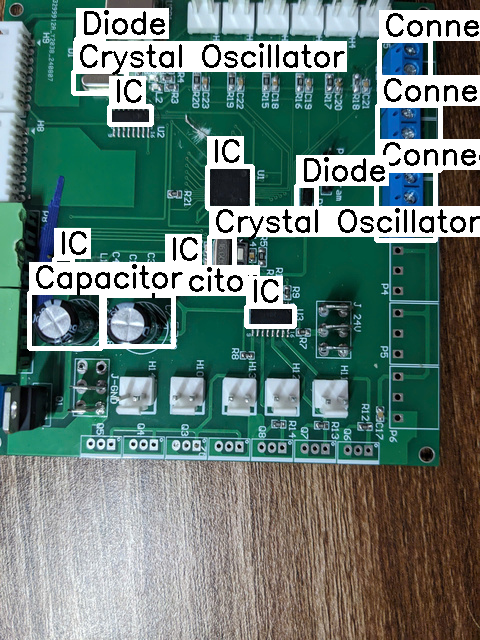

In [21]:
display(training_data.visualize.ShowBoundingBoxes(3))

FileNotFoundError: [Errno 2] No such file or directory: 'Q:\\study\\Xu_ly_anh_va_thi_giac_Robot\\final_exam\\figures\\bbox_width_distribution.png'

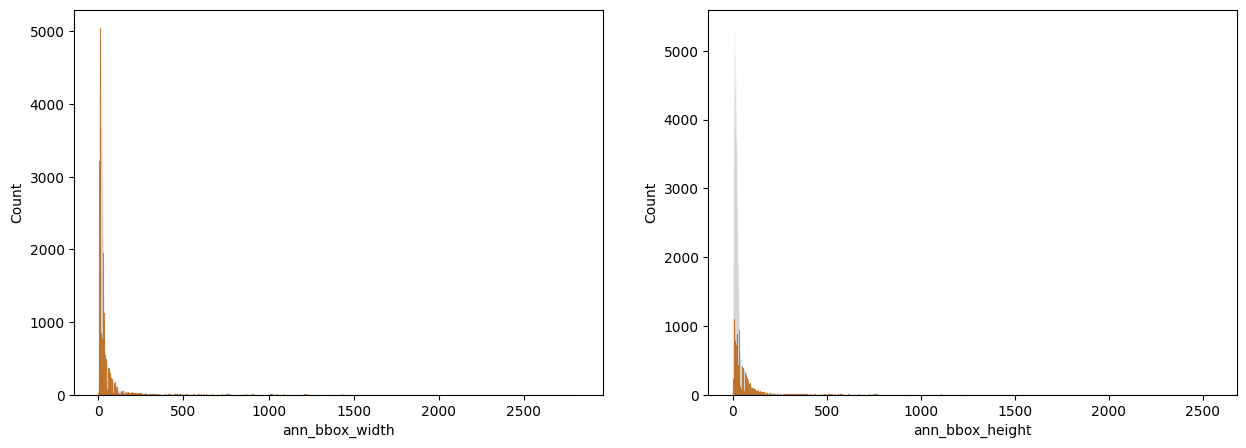

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=dataset.ann_bbox_width, ax=axes.flatten()[0])
sns.histplot(data=dataset.ann_bbox_height, ax=axes.flatten()[1])

bbox_width_dist = sns.histplot(data=dataset.ann_bbox_width, ax=axes.flatten()[0]).get_figure()
bbox_height_dist = sns.histplot(data=dataset.ann_bbox_height, ax=axes.flatten()[1]).get_figure()

bbox_width_dist.savefig('./figures/bbox_width_distribution.png')
bbox_height_dist.savefig('./figures/bbox_height_distribution.png')